In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape


(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df = df.drop('customerID', axis=1)

In [9]:

df = df.rename(columns={
    'gender': 'Gender',
    'SeniorCitizen': 'Senior_Citizen',
    'tenure': 'Tenure',
    'PhoneService': 'Phone_Service',
    'MultipleLines': 'Multiple_Lines',
    'InternetService': 'Internet_Service',
    'OnlineSecurity': 'Online_Security',
    'OnlineBackup': 'Online_Backup',
    'DeviceProtection': 'Device_Protection',
    'TechSupport': 'Tech_Support',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Movies',
    'PaperlessBilling': 'Paperless_Billing',
    'PaymentMethod': 'Payment_Method',
    'MonthlyCharges': 'Monthly_Charges',
    'TotalCharges': 'Total_Charges'
})

In [10]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.isna().sum().sum()

0

In [12]:
df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [13]:
df.dtypes

Gender                object
Senior_Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [14]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

df = df.dropna(subset=['Total_Charges'])

df['Total_Charges'] = df['Total_Charges'].astype(float)

c:\Users\kushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


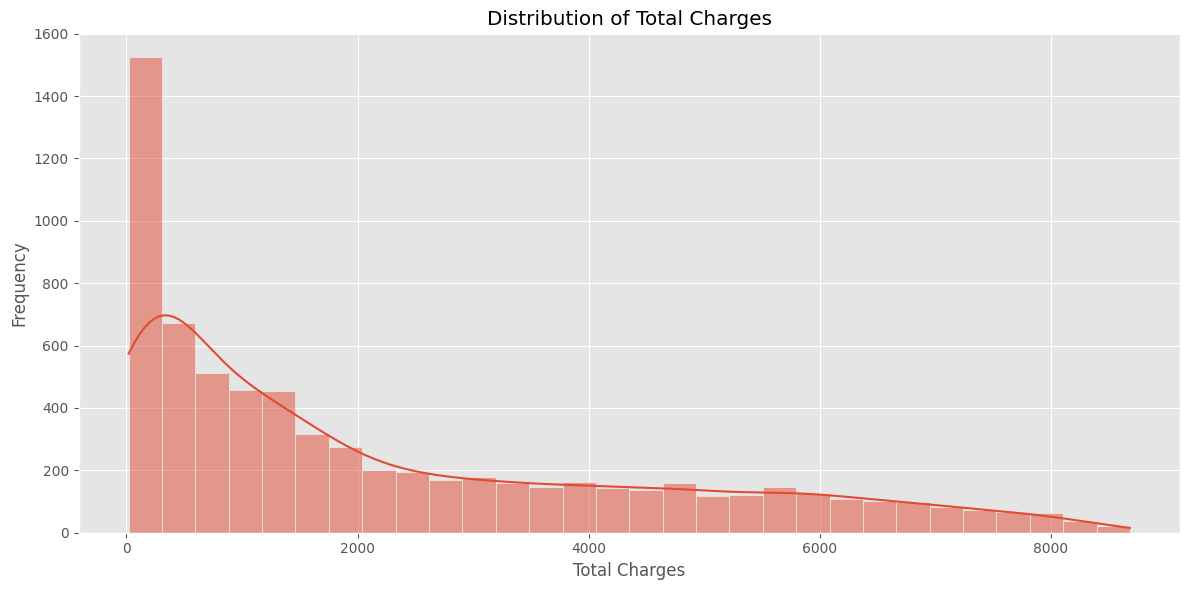

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total_Charges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

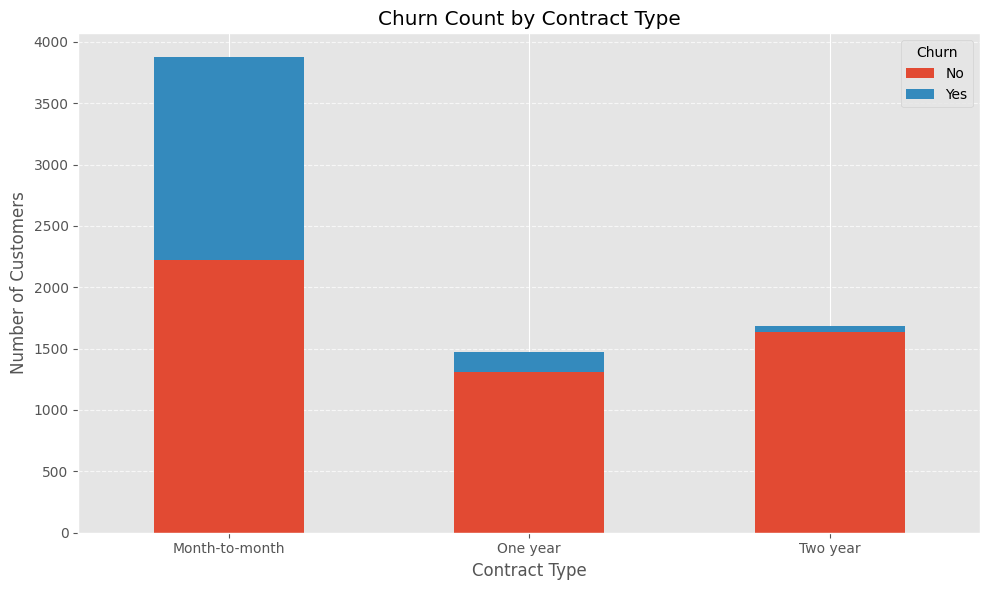

In [16]:

df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
df_clean = df.dropna(subset=['Total_Charges'])

contract_churn = df_clean.groupby(['Contract', 'Churn']).size().unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
num_features = ['Tenure', 'Monthly_Charges', 'Total_Charges']

cat_features = ['Gender','Senior_Citizen','Partner','Dependents','Phone_Service','Multiple_Lines',
                'Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support',
                'Streaming_TV', 'Streaming_Movies','Contract','Paperless_Billing','Payment_Method']

target = 'Churn'

In [18]:
# Prepare features and labels
X = df[num_features + cat_features]
y = df[target].map({'Yes': 1, 'No': 0})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [19]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver='liblinear',class_weight='balanced'))
])

In [20]:
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__max_iter': [100, 500, 1000]
}

# Use GridSearchCV for model tuning and evaluation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__max_iter': [100, 500, ...], 'model__penalty': ['l1', 'l2']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [21]:
best_model = grid_search.best_estimator_

In [22]:

# Make predictions
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)


# Evaluate accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [23]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print('-' * 87)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print('-' * 87)
print("Classification Report:\n")
print(classification_report(y_test, test_pred))

Train Accuracy: 0.75
Test Accuracy: 0.73
---------------------------------------------------------------------------------------
Best Hyperparameters: {'model__C': 1, 'model__max_iter': 1000, 'model__penalty': 'l1'}
---------------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.80      0.61       467

    accuracy                           0.73      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.80      0.73      0.75      1758



In [24]:
sample_data = pd.DataFrame({
    'Gender': ['Female'],
    'Senior_Citizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'Tenure': [12],
    'Phone_Service': ['Yes'],
    'Multiple_Lines': ['No'],
    'Internet_Service': ['DSL'],
    'Online_Security': ['No'],
    'Online_Backup': ['Yes'],
    'Device_Protection': ['No'],
    'Tech_Support': ['No'],
    'Streaming_TV': ['Yes'],
    'Streaming_Movies': ['No'],
    'Contract': ['Month-to-month'],
    'Paperless_Billing': ['Yes'],
    'Payment_Method': ['Electronic check'],
    'Monthly_Charges': [70.35],
    'Total_Charges': [843.45]
})

In [25]:
prediction = best_model.predict(sample_data)
result = 'Yes – Customer is likely to churn!' if prediction[0] == 1 else 'No – Customer is likely to stay.'

print("Prediction Result")
print("=" * 75)
print(f"Customer Profile: {sample_data['Gender'][0]}, Contract: {sample_data['Contract'][0]}, Monthly Charges: ${sample_data['Monthly_Charges'][0]}")
print()
print(f"Predicted Churn: {result}")
print("=" * 75)

Prediction Result
Customer Profile: Female, Contract: Month-to-month, Monthly Charges: $70.35

Predicted Churn: Yes – Customer is likely to churn!


In [26]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)